In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

df = pd.read_csv('diabetes.csv')


data = df.drop(['Outcome'], axis = 1)
target = df['Outcome']

target = target.replace('Yes', '1')
target = target.replace('No', '0')

from sklearn.model_selection import train_test_split
datasets = train_test_split(data, target,
                            test_size=0.2)

X_train, X_test, y_train, y_test = datasets

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
X_train.shape

(614, 8)

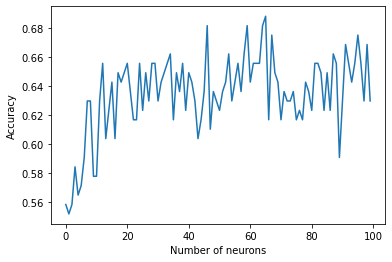

In [120]:
acc = np.zeros(100)

for i in range(100):
    mlp = MLPClassifier(hidden_layer_sizes=i+1, max_iter=5000, activation = 'logistic')
    mlp.fit(X_train, y_train)
    predictions_test = mlp.predict(X_test)
    acc[i] = accuracy_score(predictions_test, y_test)
    if i == np.argmax(acc):
        max_prediction = predictions_test
 
plt.xlabel("Number of neurons") 
plt.ylabel("Accuracy") 
plt.plot(acc)

In [121]:
n = np.argmax(acc)
print("Number of neurons for maximum accuracy =", n)
print("Accuracy = ", acc[n])

Number of neurons for maximum accuracy = 65
Accuracy =  0.6883116883116883


In [122]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print("Performance metrics for sigmoid activation function: ")

y_true = y_test
y_pred = max_prediction
print('\nConfusion Matrix: \n', confusion_matrix(y_true, y_pred))

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_true,y_pred,labels=[0,1]).reshape(-1)
print('\nOutcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_true,y_pred,labels=[0,1])
print('\nClassification report : \n',matrix)

Performance metrics for sigmoid activation function: 

Confusion Matrix: 
 [[75 11]
 [37 31]]

Outcome values : 
 75 11 37 31

Classification report : 
               precision    recall  f1-score   support

           0       0.67      0.87      0.76        86
           1       0.74      0.46      0.56        68

    accuracy                           0.69       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.70      0.69      0.67       154



In [123]:
print("Rectified Linear Activation Function:\n")

mlp = MLPClassifier(hidden_layer_sizes=n, max_iter=5000, activation = 'relu')
mlp.fit(X_train, y_train)
predictions_test = mlp.predict(X_test)

print('Number of hidden neurons = ', n)

print('\nAccuracy  = ', accuracy_score(predictions_test, y_test))

y_true = y_test
y_pred = predictions_test
print('\nConfusion Matrix: \n', confusion_matrix(y_true, y_pred))

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_true,y_pred,labels=[0,1]).reshape(-1)
print('\nOutcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_true,y_pred,labels=[0,1])
print('\nClassification report : \n',matrix)

Rectified Linear Activation Function:

Number of hidden neurons =  65

Accuracy  =  0.6103896103896104

Confusion Matrix: 
 [[78  8]
 [52 16]]

Outcome values : 
 78 8 52 16

Classification report : 
               precision    recall  f1-score   support

           0       0.60      0.91      0.72        86
           1       0.67      0.24      0.35        68

    accuracy                           0.61       154
   macro avg       0.63      0.57      0.54       154
weighted avg       0.63      0.61      0.56       154



In [124]:
print("Tanh Hidden Layer Activation Function:\n")

mlp = MLPClassifier(hidden_layer_sizes=n, max_iter=5000, activation = 'tanh')
mlp.fit(X_train, y_train)
predictions_test = mlp.predict(X_test)

print('Number of hidden neurons = ', n)

print('\nAccuracy  = ', accuracy_score(predictions_test, y_test))

y_true = y_test
y_pred = predictions_test
print('\nConfusion Matrix: \n', confusion_matrix(y_true, y_pred))

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_true,y_pred,labels=[0,1]).reshape(-1)
print('\nOutcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_true,y_pred,labels=[0,1])
print('\nClassification report : \n',matrix)

Tanh Hidden Layer Activation Function:

Number of hidden neurons =  65

Accuracy  =  0.6493506493506493

Confusion Matrix: 
 [[76 10]
 [44 24]]

Outcome values : 
 76 10 44 24

Classification report : 
               precision    recall  f1-score   support

           0       0.63      0.88      0.74        86
           1       0.71      0.35      0.47        68

    accuracy                           0.65       154
   macro avg       0.67      0.62      0.60       154
weighted avg       0.67      0.65      0.62       154



In [125]:
print("No Op Activation Function:\n")

mlp = MLPClassifier(hidden_layer_sizes=n, max_iter=5000, activation = 'identity')
mlp.fit(X_train, y_train)
predictions_test = mlp.predict(X_test)

print('Number of hidden neurons = ', n)

print('\nAccuracy  = ', accuracy_score(predictions_test, y_test))

y_true = y_test
y_pred = predictions_test
print('\nConfusion Matrix: \n', confusion_matrix(y_true, y_pred))

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_true,y_pred,labels=[0,1]).reshape(-1)
print('\nOutcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_true,y_pred,labels=[0,1])
print('\nClassification report : \n',matrix)

No Op Activation Function:

Number of hidden neurons =  65

Accuracy  =  0.525974025974026

Confusion Matrix: 
 [[15 71]
 [ 2 66]]

Outcome values : 
 15 71 2 66

Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.17      0.29        86
           1       0.48      0.97      0.64        68

    accuracy                           0.53       154
   macro avg       0.68      0.57      0.47       154
weighted avg       0.71      0.53      0.45       154

